In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ruptures import Dynp, Pelt
import pandas as pd
from scipy.stats import median_abs_deviation
from src import CPOP

In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
df = pd.read_csv('./data/BTC-USD.csv')

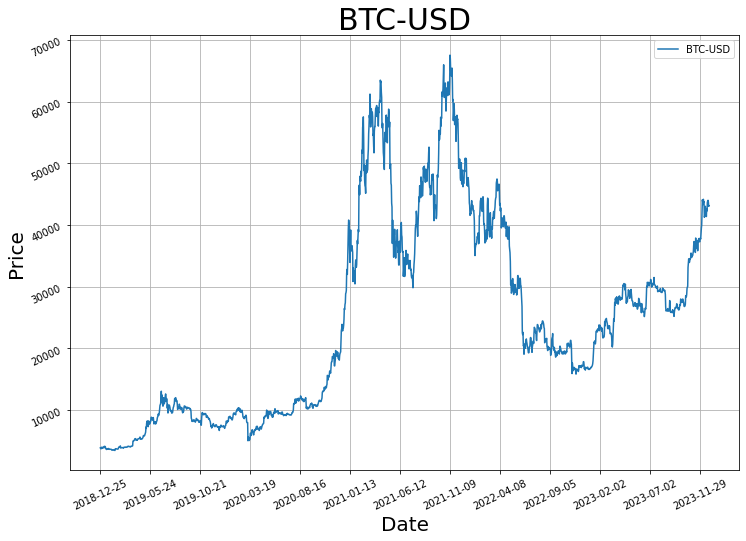

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(df['Date'], df['Close'], label='BTC-USD')
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Price', fontsize=20)
ax.set_title('BTC-USD', fontsize=30)
ax.grid(True)
ax.tick_params(labelrotation=25)
#set tick frequency
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.legend()

plt.show()

In [36]:
X = df['Close'].values.reshape(-1, 1)
X = X[0:1000]
X_norm = 10*(X-np.min(X))/(np.max(X)-np.min(X))
X_norm = X_norm[::2]

In [37]:
CPOP_breakpoints = CPOP(X_norm.flatten(), beta = 1, sigma = median_abs_deviation(X_norm.flatten()), verbose = True)

Iterations 500/500 : 2427 taus stored
optimal cost: 2.730201516958455


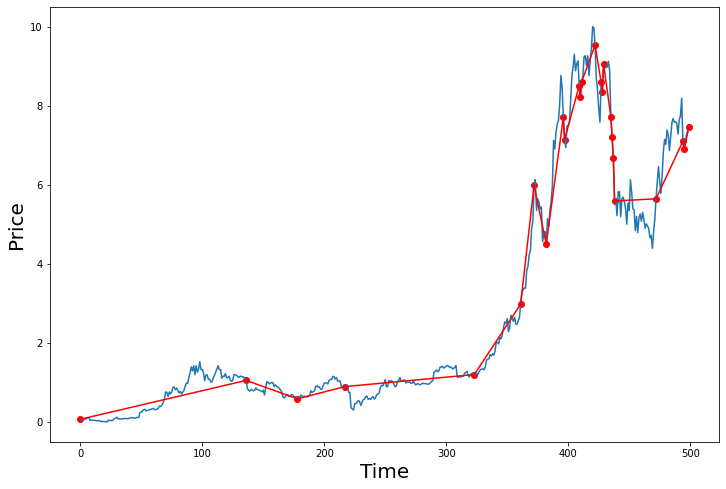

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(X_norm, label='BTC-USD')
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Price', fontsize=20)
ax.scatter(CPOP_breakpoints, X_norm[CPOP_breakpoints], color='red', label='CPOP breakpoints')
for k in range(1, len(CPOP_breakpoints)):
    slope = (X_norm[CPOP_breakpoints[k]] - X_norm[CPOP_breakpoints[k-1]])/(CPOP_breakpoints[k] - CPOP_breakpoints[k-1])
    fct = lambda x: slope*(x - CPOP_breakpoints[k-1]) + X_norm[CPOP_breakpoints[k-1]]
    ax.plot(np.arange(CPOP_breakpoints[k-1], CPOP_breakpoints[k]+1), fct(np.arange(CPOP_breakpoints[k-1], CPOP_breakpoints[k]+1)), color='red')


Iterations 100/100 : 438 taus stored
optimal cost: 0.08585346382229808


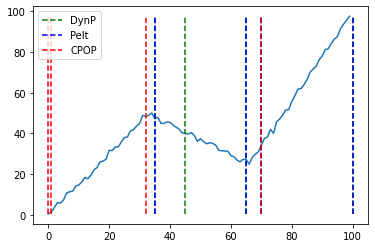

In [3]:
n = 100
sigma = 1

# create a pice-wise linear signal
phis = [0, 50, 25, 100]
taus = [0, n // 3, 2 * n // 3, n]

signal = np.zeros(n)
for i in range(len(taus) - 1):
    for t in range(taus[i], taus[i + 1]):
        signal[t] = phis[i] + (phis[i + 1] - phis[i]) / (taus[i + 1] - taus[i]) * (
            t - taus[i]
        )

np.random.seed(42)
signal += np.random.normal(loc=0, scale=sigma, size=n)


changepoints_cpop = CPOP(signal, 20 * np.log(n), sigma=sigma, verbose=True)
changepoints_dynp = Dynp(model="clinear").fit_predict(signal, n_bkps=len(phis))
changepoints_pelt = Pelt(model="clinear").fit_predict(signal, pen=400)

plt.plot(signal)
plt.vlines(
    changepoints_dynp,
    ymin=np.min(signal),
    ymax=np.max(signal),
    color="g",
    linestyle="--",
    label="DynP",
)
plt.vlines(
    changepoints_pelt,
    ymin=np.min(signal),
    ymax=np.max(signal),
    color="b",
    linestyle="--",
    label="Pelt",
)
plt.vlines(
    changepoints_cpop,
    ymin=np.min(signal),
    ymax=np.max(signal),
    color="r",
    linestyle="--",
    label="CPOP",
)

plt.legend()
plt.show()